In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
train = pd.read_csv(r"C:\Users\Durgeshwar.Singh\Downloads\train.csv" )

In [3]:
train['cpu_usage'] = train['cpu_01_busy']

In [4]:
train.drop('cpu_01_busy' , inplace=True ,axis=1)

In [5]:
train.tail()

,sample_time,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_usage
178775,2010-12-13 23:59:00,c,0.0,0.0,0.0,0.0,260,22,0.0,0.0,...,0,462.983,594.967,15.900,21.317,380.133,367.300,466.600,318.817,0.0
178776,2010-12-13 23:59:00,d,0.0,0.0,0.0,0.0,225,10,0.0,0.0,...,0,404.717,471.350,21.833,29.267,366.067,260.167,303.583,414.183,0.0
178777,2010-12-13 23:59:00,e,0.0,0.0,0.0,0.0,247,10,0.0,0.0,...,0,377.067,414.600,24.750,34.183,371.000,453.050,285.200,242.833,0.0
178778,2010-12-13 23:59:00,f,0.0,0.0,0.0,0.0,172,10,0.0,0.0,...,0,262.250,262.550,0.700,0.017,286.317,234.883,315.450,295.200,0.0
178779,2010-12-13 23:59:00,g,0.0,0.0,0.0,0.0,218,2,0.0,0.0,...,0,573.400,750.417,20.033,27.417,433.300,712.283,512.117,497.917,0.0


In [6]:
test = pd.read_csv(r"C:\Users\Durgeshwar.Singh\Downloads\test.csv")
test.drop('Id' , inplace=True ,axis=1)

In [7]:
test.head()

,sample_time,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,2010-12-15 14:46:00,c,235.32,559.38,0.00,0.00,260,22,11.28,0.00,...,0,0,427.567,502.167,16.150,21.467,388.383,226.300,245.450,373.417
1,2010-12-16 12:18:00,a,71.18,713.85,0.08,0.00,272,12,23.40,0.08,...,4,0,385.033,480.167,68.433,90.183,521.883,445.617,480.317,443.833
2,2010-12-16 11:11:00,e,50.03,647.15,0.03,0.00,247,10,21.92,0.00,...,0,0,446.633,619.983,25.500,35.017,242.567,288.317,379.383,228.617
3,2010-12-18 23:03:00,g,42.12,492.22,22.90,3.92,218,2,0.13,6.80,...,0,0,372.917,739.933,19.700,26.933,469.283,619.267,566.817,515.067
4,2010-12-20 06:28:00,e,38.22,606.45,0.00,0.00,247,10,6.85,0.00,...,0,0,391.150,365.383,25.400,34.883,218.100,384.267,394.900,282.767


In [8]:
server_a = train[train['m_id'] == 'a']

In [9]:
server_a = server_a.loc[: , ['sample_time' ,'cpu_usage' ]]
validation = server_a.iloc[-1:]
server_a = server_a[:-1]

In [10]:
server_a['sample_time'].values[1]

'2010-11-24 00:02:00'

In [11]:
server_a.dtypes

sample_time     object
cpu_usage      float64
dtype: object

In [12]:
server_a['sample_time']  = pd.to_datetime(server_a['sample_time'])

In [13]:
server_a.dtypes

sample_time    datetime64[ns]
cpu_usage             float64
dtype: object

In [14]:
server_a = server_a.set_index('sample_time')

In [15]:
server_a.index

DatetimeIndex(['2010-11-24 00:01:00', '2010-11-24 00:02:00',
               '2010-11-24 00:03:00', '2010-11-24 00:04:00',
               '2010-11-24 00:05:00', '2010-11-24 00:06:00',
               '2010-11-24 00:07:00', '2010-11-24 00:08:00',
               '2010-11-24 00:09:00', '2010-11-24 00:10:00',
               ...
               '2010-12-13 23:49:00', '2010-12-13 23:50:00',
               '2010-12-13 23:51:00', '2010-12-13 23:52:00',
               '2010-12-13 23:53:00', '2010-12-13 23:54:00',
               '2010-12-13 23:55:00', '2010-12-13 23:56:00',
               '2010-12-13 23:57:00', '2010-12-13 23:58:00'],
              dtype='datetime64[ns]', name='sample_time', length=25539, freq=None)

In [16]:
ts = server_a['cpu_usage'] 
ts.head(10)

sample_time
2010-11-24 00:01:00    26.92
2010-11-24 00:02:00    19.27
2010-11-24 00:03:00    15.73
2010-11-24 00:04:00    16.70
2010-11-24 00:05:00    20.57
2010-11-24 00:06:00    20.68
2010-11-24 00:07:00    16.70
2010-11-24 00:08:00    18.90
2010-11-24 00:09:00    16.68
2010-11-24 00:10:00    17.55
Name: cpu_usage, dtype: float64

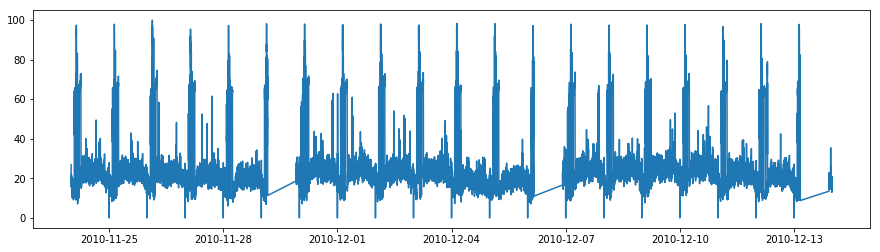

In [17]:
plt.figure(figsize=(15,4))
plt.plot(ts)
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
#from sklearn.preprocessing import MinMaxScaler

In [19]:
ts = ts.replace(0 , ts.mean())

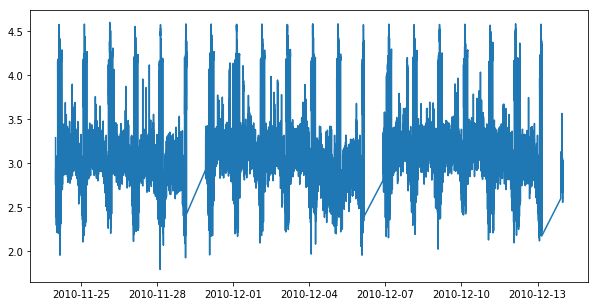

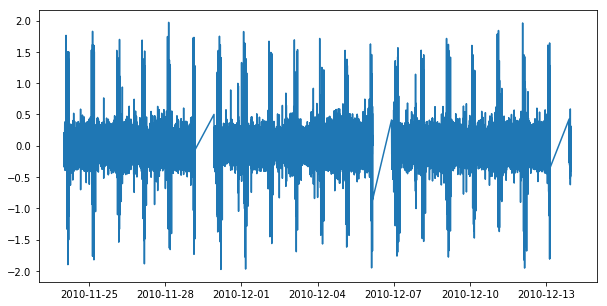

In [20]:
ts_log = np.log(ts)
plt.figure(figsize=(10,5))
plt.plot(ts_log)
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff)

In [21]:
ts_log_diff =ts_log_diff.fillna(0)

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


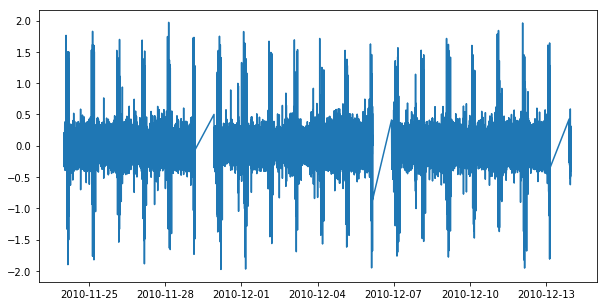

In [22]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff)


Text(0.5,1,'RSS: 1224.8170')

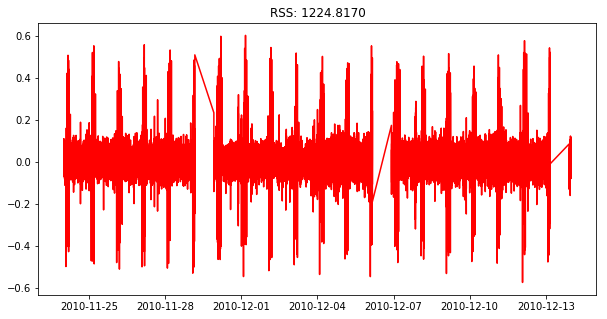

In [23]:
plt.figure(figsize=(10,5))
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(((results_AR.fittedvalues-ts_log_diff).fillna(0))**2))

In [24]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

sample_time
2010-11-24 00:02:00   -0.000016
2010-11-24 00:03:00    0.088705
2010-11-24 00:04:00    0.109621
2010-11-24 00:05:00    0.010979
2010-11-24 00:06:00   -0.071882
dtype: float64

In [74]:
final_df = pd.DataFrame(index = predictions_ARIMA_diff.index)
final_df['Expected'] = server_a.iloc[1:]
final_df['error'] =  10**predictions_ARIMA_diff

In [84]:
final_df['predicted'] = final_df["Expected"] + final_df['error']

In [85]:
from sklearn.metrics import mean_squared_error

In [78]:
X = server_a.values
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
yhat2 = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    yhat2.append(yhat[0])
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=19.356646, expected=20.400000
predicted=20.255384, expected=21.530000
predicted=21.321950, expected=19.300000
predicted=19.623299, expected=16.470000
predicted=17.429808, expected=17.530000
predicted=17.868598, expected=18.970000
predicted=18.973838, expected=18.780000
predicted=18.927208, expected=19.080000
predicted=18.941291, expected=16.130000
predicted=16.643180, expected=19.820000
predicted=19.237849, expected=16.530000
predicted=17.141527, expected=17.370000
predicted=17.560197, expected=21.580000
predicted=20.582631, expected=16.770000
predicted=17.158134, expected=23.300000
predicted=22.001138, expected=18.270000
predicted=18.492769, expected=19.000000
predicted=18.979306, expected=20.850000
predicted=20.643831, expected=15.180000
predicted=16.264289, expected=21.770000
predicted=21.197049, expected=18.770000
predicted=18.855629, expected=21.800000
predicted=21.035588, expected=20.620000
predicted=20.528255, expected=19.850000
predicted=19.561318, expected=19.470000


predicted=14.706160, expected=14.470000
predicted=14.289204, expected=11.570000
predicted=12.160982, expected=13.900000
predicted=13.592606, expected=10.400000
predicted=11.102666, expected=13.180000
predicted=13.184166, expected=13.720000
predicted=13.541482, expected=11.730000
predicted=11.939803, expected=17.900000
predicted=16.477503, expected=12.480000
predicted=12.706946, expected=15.600000
predicted=15.047429, expected=14.630000
predicted=14.550266, expected=12.050000
predicted=12.559458, expected=13.180000
predicted=13.684958, expected=10.650000
predicted=11.367852, expected=11.250000
predicted=11.840156, expected=18.680000
predicted=16.979045, expected=11.920000
predicted=12.382213, expected=13.470000
predicted=13.403737, expected=20.420000
predicted=18.250711, expected=16.770000
predicted=16.230091, expected=15.020000
predicted=15.597425, expected=12.000000
predicted=12.790172, expected=17.850000
predicted=16.910187, expected=11.700000
predicted=13.267508, expected=13.250000


predicted=20.772065, expected=17.320000
predicted=18.046486, expected=18.720000
predicted=18.520967, expected=20.070000
predicted=19.811100, expected=17.230000
predicted=17.590123, expected=17.500000
predicted=18.024807, expected=18.250000
predicted=18.137086, expected=16.100000
predicted=16.731845, expected=19.720000
predicted=19.251061, expected=14.430000
predicted=15.412450, expected=19.350000
predicted=18.655561, expected=19.580000
predicted=19.106680, expected=15.750000
predicted=16.307435, expected=19.420000
predicted=19.029869, expected=16.550000
predicted=16.725863, expected=19.580000
predicted=19.170461, expected=17.880000
predicted=18.110964, expected=16.730000
predicted=16.925645, expected=16.700000
predicted=17.118600, expected=17.400000
predicted=17.311394, expected=17.550000
predicted=17.669272, expected=14.500000
predicted=15.336086, expected=20.400000
predicted=19.245213, expected=17.950000
predicted=17.831985, expected=19.830000
predicted=19.216153, expected=18.230000


In [29]:
len(X) * 0.98

25028.22

In [86]:
new_df = server_a.iloc[25029:]
new_df['predicted'] =  yhat2[1:]
new_df['Expected'] = new_df['cpu_usage']
new_df.drop('cpu_usage' , axis = 1 , inplace = True)

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

In [87]:
new_df['x'] = new_df.index

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
#new_df

In [90]:
import matplotlib.pylab as plb

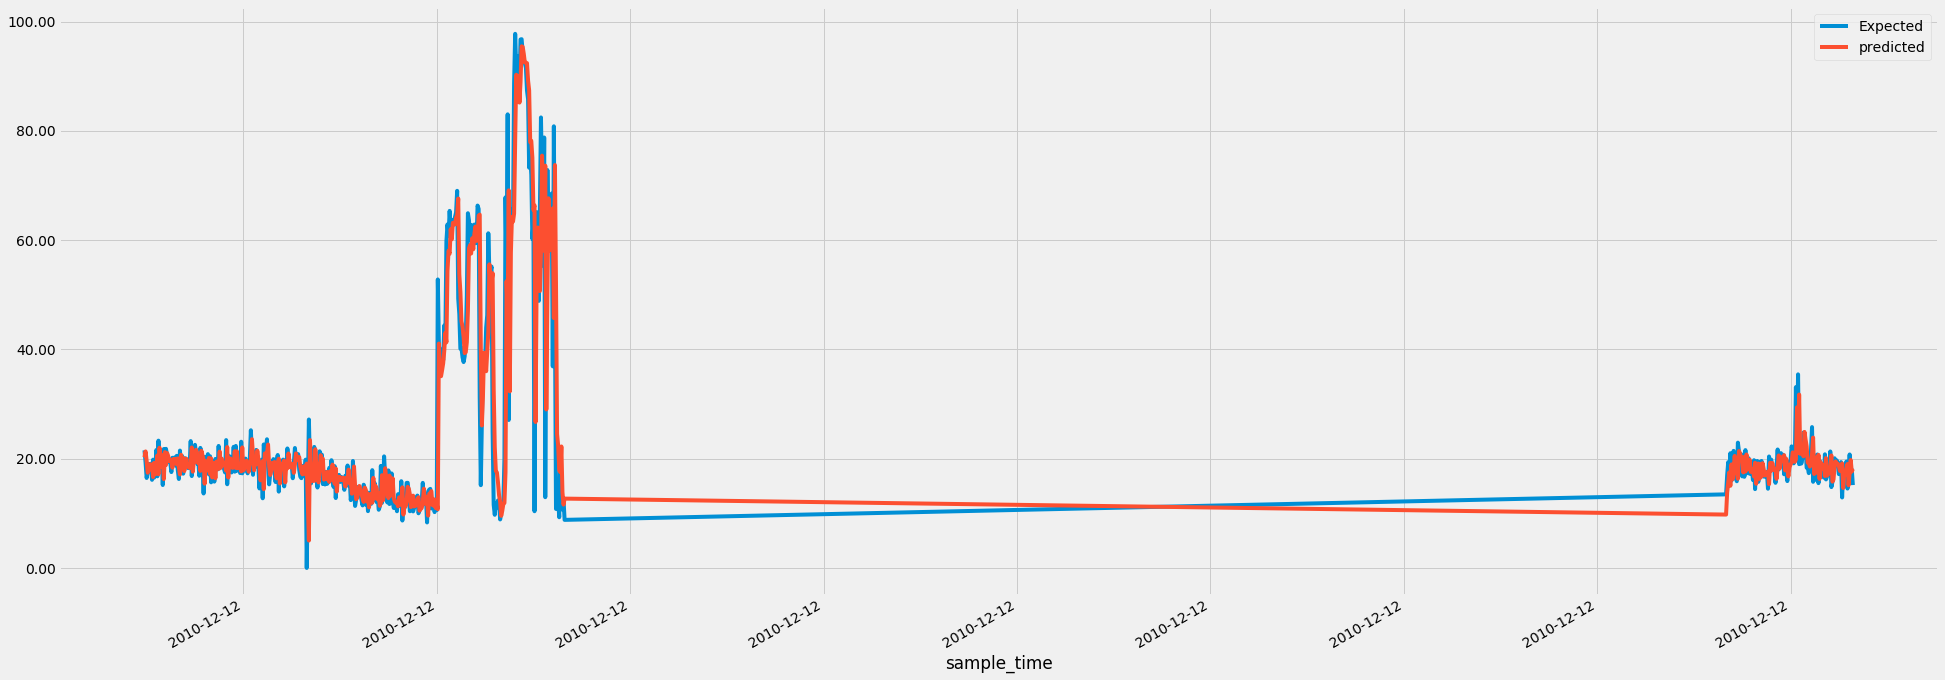

In [93]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(30,12))
ax = new_df['Expected'].plot(legend = "Expected")
ax = new_df['predicted'].plot(legend = 'Predicted')
ticklabels = new_df.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

In [95]:
new_df.drop('x' ,axis=1,inplace=True)

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
new_df

,predicted,Expected
sample_time,,
2010-12-12 21:28:00,20.255384,21.53
2010-12-12 21:29:00,21.321950,19.30
2010-12-12 21:30:00,19.623299,16.47
2010-12-12 21:31:00,17.429808,17.53
2010-12-12 21:32:00,17.868598,18.97
2010-12-12 21:33:00,18.973838,18.78
2010-12-12 21:34:00,18.927208,19.08
2010-12-12 21:35:00,18.941291,16.13
2010-12-12 21:36:00,16.643180,19.82
